In [2]:
!pwd
!ls

/Users/svenjalueg/Analytical Tools and the Study of the Bible Code
<L_JD.xlsx
<L_KP.xlsx
<l_jd.csv
<l_kp.csv
Assignment 07 Text-Fabric Svenja Lueg.ipynb
BJD Excel.xlsx
BJD extended.xlsx
BKP.xlsx
Distribution <LJD.ipynb
Distribution <LKP.ipynb
Distribution BJD.ipynb
Distribution BKP.ipynb
TF1.ipynb
bjd.csv
bjd_annotated.csv
bkp.csv
~$<L_JD.xlsx
~$<L_KP.xlsx
~$BJD extended.xlsx
~$BKP.xlsx


In [3]:
import sys, collections, os
import pprint as pp
import pandas as pd
import numpy as np
from enum import Enum, IntEnum
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tf.app import use

A = use('ETCBC/bhsa:hot', hoist=globals())

**Locating corpus resources ...**

rate limit is 60 requests per hour, with 60 left for this hour
To increase the rate,see https://annotation.github.io/text-fabric/tf/advanced/repo.html#github
	connecting to online GitHub repo ETCBC/bhsa ... connected


Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [44]:
bjd_dict = {}

for w in F.otype.s('word'):
    if F.lex.v(w) == 'JD/' and F.lex.v(w-1) == 'B':
        
        bo, ch, ve = T.sectionFromNode(w)
        
        sentence = L.u(w, 'sentence')[0]
        sentence_hebr = T.text(sentence, ftm="text-trans-plain")
        sentence_tl = T.text(sentence, fmt="text-trans-plain")
        
        clause = L.u(w, 'clause')[0]
        clause_hebr = T.text(clause, ftm="text-trans-plain")
        clause_tl = T.text(clause, fmt="text-trans-plain")
        
        phrase = L.u(w, 'phrase')[0]
        function = F.function.v(phrase)
        subj = 'NA'
        objc = 'NA'
        verb = 'nominal clause'
        tense = 'NA'
        stem = 'NA'
        predicate_type = 'NA'
        
        #checking potential modifications for bjd:
        #(1)pronominal suffix,
        #(2) noun or noun phrase in the absolute state following bjd in the absolute state, or
        #(3) adjective or modifying participle
        
        modifier_bjd = 'NA'
        ps = F.prs_ps.v(w)
        nu = F.prs_nu.v(w)
        gn = F.prs_gn.v(w)
                        
        if ps in {'NA', 'unknown'}:
            ps = ''
        if nu in {'NA', 'unknown'}:
            nu = ''
        if gn in {'NA', 'unknown'}:
            gn = ''
        modifier_bjd = ps+nu+gn
        
        if modifier_bjd == '':
            modifier_bjd = 'NA'
            if F.st.v(w) == 'c' and F.st.v(w+1) == 'a':
                modifier_bjd = T.text((w+1), fmt="text-trans-plain")
            elif F.st.v(w) == 'c':
                modifier_bjd = T.text(phrase, fmt="text-trans-plain")
            elif F.sp.v(w+1) == 'adjv':
                modifier_bjd = T.text((w+1), fmt="text-trans-plain")
            elif F.vt.v(w+1) in {'ptca', 'ptcp'}:
                modifier_bjd = T.text((w+1), fmt="text-trans-plain")
        
        phrases = L.d(clause, 'phrase')
       
        for phr in phrases:
            if F.function.v(phr) in {'Pred', 'PreC'}:
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreO':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        
                        ps = F.prs_ps.v(word)
                        nu = F.prs_nu.v(word)
                        gn = F.prs_gn.v(word)
                        
                        if ps in {'NA', 'unknown'}:
                            ps = ''
                        if nu in {'NA', 'unknown'}:
                            nu = ''
                        if gn in {'NA', 'unknown'}:
                            gn = ''
                        objc = ps+nu+gn
                        if objc == '':
                            objc = 'NA'
                            
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreS':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        subj = F.prs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'Objc':
                objc = T.text(phr, fmt="text-trans-plain")
            elif F.function.v(phr) == 'Subj':
                subj = T.text(phr, fmt="text-trans-plain")
            else:
                continue
        
        if subj == 'NA':
            for phr in phrases:
                if F.function.v(phr) in {'Pred', 'PreC', 'PreO', 'PreS'}:
                    if F.function.v(phr) == 'PreS':
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.prs_ps.v(word)
                                nu = F.prs_nu.v(word)
                                gn = F.prs_gn.v(word)
                    else:
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.ps.v(word)
                                nu = F.nu.v(word)
                                gn = F.gn.v(word)
                
                    if ps in {'NA', 'unknown'}:
                        ps = ''
                    if nu in {'NA', 'unknown'}:
                        nu = ''
                    if gn in {'NA', 'unknown'}:
                        gn = ''
                    subj = ps+nu+gn
                    if subj == '':
                        subj = 'NA'
                else:
                    continue
        
        info = [w, bo, ch, ve,
                sentence_hebr, sentence_tl, clause_hebr, clause_tl,
                verb, tense, stem, predicate_type,
                function, subj, objc, modifier_bjd
               ]
        
        bjd_dict[w] = info

In [45]:
header = [
    'slot', 'book', 'chapter', 'verse',
    'sentence_hebr', 'sentence_tl', 'clause_hebr', 'clause_tl',
    'verb', 'tense', 'stem', 'predicate_type',
    'function_bjd', 'subject', 'object', 'modifier_bjd'
]

bjd_df = pd.DataFrame(bjd_dict).T
bjd_df.columns = header
print(bjd_df.shape)
print(bjd_df.head(10))

(612, 16)
        slot     book chapter verse   
4084    4084  Genesis       9     2  \
6591    6591  Genesis      14    20   
7147    7147  Genesis      16     6   
8780    8780  Genesis      19    16   
8783    8783  Genesis      19    16   
8787    8787  Genesis      19    16   
10364  10364  Genesis      22     6   
11319  11319  Genesis      24    10   
13916  13916  Genesis      27    17   
16200  16200  Genesis      30    35   

                                           sentence_hebr   
4084                             בְּיֶדְכֶ֥ם נִתָּֽנוּ׃   \
6591   וּבָרוּךְ֙ אֵ֣ל עֶלְיֹ֔ון אֲשֶׁר־מִגֵּ֥ן צָרֶ֖...   
7147                    הִנֵּ֤ה שִׁפְחָתֵךְ֙ בְּיָדֵ֔ךְ    
8780   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
8783   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
8787   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
10364  וַיִּקַּ֣ח בְּיָדֹ֔ו אֶת־הָאֵ֖שׁ וְאֶת־הַֽמַּא...   
11319                   וְכָל־ט֥וּב אֲדֹנָ֖יו בְּיָדֹ֑ו    
13916  וַתִּתֵּ֧ן אֶ

In [46]:
bjd_df.to_csv("bjd.csv", sep="\t", index=False)

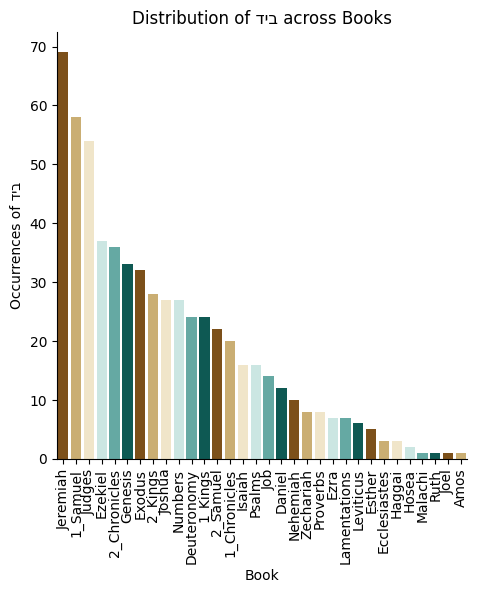

In [47]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=bjd_df,
    x='book',
    y=None,
    kind = 'count',
    palette=colors,
    order = bjd_df['book'].value_counts().index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Book', ylabel='Occurrences of דיב', title = 'Distribution of דיב across Books')

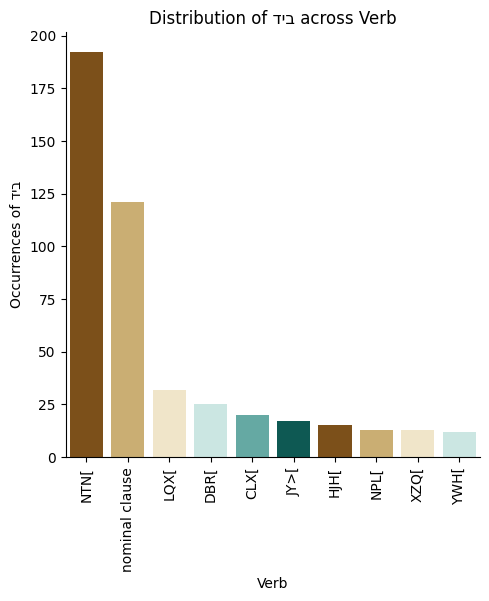

In [48]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=bjd_df,
    x='verb',
    y=None,
    kind = 'count',
    palette=colors,
    order = bjd_df['verb'].value_counts().iloc[:10].index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Verb', ylabel='Occurrences of דיב', title = 'Distribution of דיב across Verb')

In [49]:
number_of_occurrences = {}
verb_selection = []

for verb in bjd_df['verb']:
    count = bjd_df['verb'].value_counts()[verb]
    number_of_occurrences[verb] = count
    if count >= 10 and verb not in verb_selection:
        verb_selection.append(verb)

number_of_occurrences = dict(sorted(number_of_occurrences.items(), key=lambda item: item[1]))

print(verb_selection)
number_of_occurrences

['NTN[', 'nominal clause', 'XZQ[', 'LQX[', 'CLX[', 'DBR[', 'JY>[', 'YWH[', 'HJH[', 'SGR[', 'MKR[', 'NPL[']


{'MGN[': 1,
 'GRC[': 1,
 'TMK[': 1,
 'NG<[': 1,
 'VWH[': 1,
 'CMR[': 1,
 'NS<[': 1,
 'DBQ[': 1,
 'YWR[': 1,
 'QVP[': 1,
 'LQQ[': 1,
 'HLL==[': 1,
 'NKR[': 1,
 'QWM[': 1,
 'SPH[': 1,
 '<NH[': 1,
 'NXM[': 1,
 'SKR[': 1,
 'NWX[': 1,
 'MWG[': 1,
 'CXT[': 1,
 'LXM[': 1,
 'TMM[': 1,
 'XTR[': 1,
 'MLK[': 1,
 'CBT[': 1,
 'CMM[': 1,
 'DMH[': 1,
 'QR>[': 1,
 'NXH[': 1,
 'CMV[': 1,
 'JRH[': 1,
 'XLP[': 1,
 'XTM[': 1,
 'HRS[': 1,
 'HLK[': 1,
 'FQD[': 1,
 'PRF[': 1,
 'XWL[': 1,
 'TLH[': 1,
 'MX>[': 1,
 'PDH[': 1,
 'GLH[': 1,
 'MCX[': 1,
 'PRY[': 1,
 'JDH[': 1,
 'HLL[': 1,
 'NTK[': 1,
 'CWB[': 2,
 'JRD[': 2,
 'NKH[': 2,
 '>XZ[': 2,
 '<WD[': 2,
 'XRP[': 2,
 'TPF[': 2,
 'R>H[': 3,
 'CLP[': 3,
 '<LH[': 3,
 'KWN[': 3,
 'JHB[': 3,
 'BW>[': 4,
 'YLX[': 4,
 'MWT[': 4,
 '<FH[': 4,
 'JC<[': 4,
 'NGN[': 4,
 'FJM[': 5,
 'PQD[': 5,
 'ML>[': 5,
 '<ZB[': 6,
 'MY>[': 9,
 'SGR[': 10,
 'MKR[': 11,
 'YWH[': 12,
 'XZQ[': 13,
 'NPL[': 13,
 'HJH[': 15,
 'JY>[': 17,
 'CLX[': 20,
 'DBR[': 25,
 'LQX[': 32,
 'nominal clause

In [68]:
bjd_df_annotated = pd.read_csv("bjd_annotated.csv", sep=",")
print(bjd_df_annotated.shape)
print(bjd_df_annotated.head(10))

(612, 18)
    slot     book  chapter  verse   
0   4084  Genesis        9      2  \
1   6591  Genesis       14     20   
2   7147  Genesis       16      6   
3   8780  Genesis       19     16   
4   8783  Genesis       19     16   
5   8787  Genesis       19     16   
6  10364  Genesis       22      6   
7  11319  Genesis       24     10   
8  13916  Genesis       27     17   
9  16200  Genesis       30     35   

                                       sentence_hebr   
0                            בְּיֶדְכֶ֥ם נִתָּֽנוּ׃   \
1  וּבָרוּךְ֙ אֵ֣ל עֶלְיֹ֔ון אֲשֶׁר־מִגֵּ֥ן צָרֶ֖...   
2                   הִנֵּ֤ה שִׁפְחָתֵךְ֙ בְּיָדֵ֔ךְ    
3  וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
4  וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
5  וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
6  וַיִּקַּ֣ח בְּיָדֹ֔ו אֶת־הָאֵ֖שׁ וְאֶת־הַֽמַּא...   
7                   וְכָל־ט֥וּב אֲדֹנָ֖יו בְּיָדֹ֑ו    
8  וַתִּתֵּ֧ן אֶת־הַמַּטְעַמִּ֛ים וְאֶת־הַלֶּ֖חֶם...   
9                     

In [69]:
#Only use data from verbs with ten or more occurrences

bjd_df_annotated = bjd_df_annotated[bjd_df_annotated.verb.isin(verb_selection)]
bjd_df_annotated = bjd_df_annotated[bjd_df_annotated.semantic_structure != 'xxx']

print(bjd_df_annotated.shape)
print(bjd_df_annotated.head(10))

(471, 18)
     slot     book  chapter  verse   
0    4084  Genesis        9      2  \
2    7147  Genesis       16      6   
3    8780  Genesis       19     16   
4    8783  Genesis       19     16   
5    8787  Genesis       19     16   
6   10364  Genesis       22      6   
7   11319  Genesis       24     10   
8   13916  Genesis       27     17   
9   16200  Genesis       30     35   
11  17747  Genesis       32     17   

                                        sentence_hebr   
0                             בְּיֶדְכֶ֥ם נִתָּֽנוּ׃   \
2                    הִנֵּ֤ה שִׁפְחָתֵךְ֙ בְּיָדֵ֔ךְ    
3   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
4   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
5   וַיַּחֲזִ֨קוּ הָאֲנָשִׁ֜ים בְּיָדֹ֣ו וּבְיַד־א...   
6   וַיִּקַּ֣ח בְּיָדֹ֔ו אֶת־הָאֵ֖שׁ וְאֶת־הַֽמַּא...   
7                    וְכָל־ט֥וּב אֲדֹנָ֖יו בְּיָדֹ֑ו    
8   וַתִּתֵּ֧ן אֶת־הַמַּטְעַמִּ֛ים וְאֶת־הַלֶּ֖חֶם...   
9                        וַיִּתֵּ֖ן בְּיַד־בָּנָֽיו׃    
1

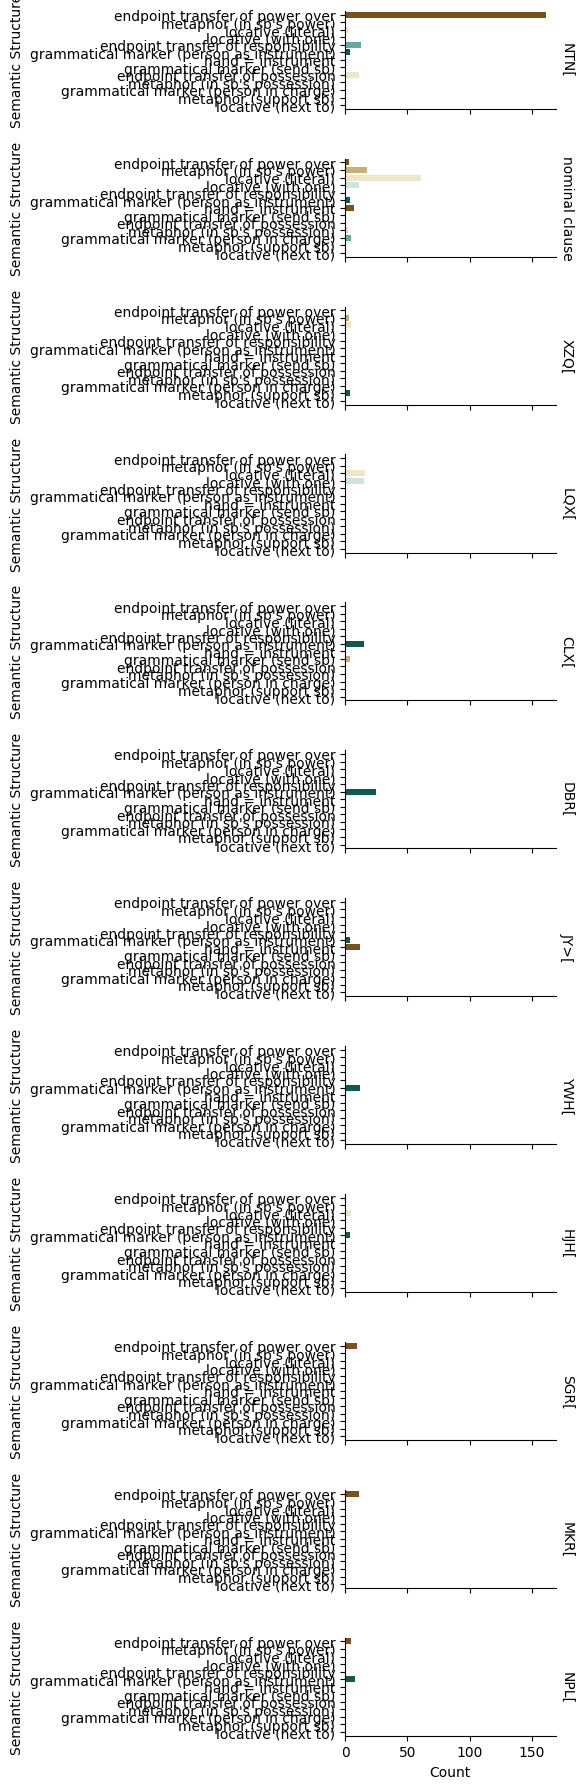

In [71]:
g = sns.catplot(
    data=bjd_df_annotated,
    x=None, y='semantic_structure', row='verb',
    kind='count',
    orient='h',
    sharex=True, margin_titles=True,
    height=1.5, aspect=4,
    palette=colors
)
g.set(xlabel='Count', ylabel='Semantic Structure')
g.set_titles(row_template='{row_name}')
#g.set_yticklabels(labels=['full nominal', 'proper name', 'pronoun'])

#plt.savefig('correlation_nominality*gram_func.png')